# Simple Linear Regression Example

This example uses the diabetes data from Sklearn in order to train a linear regression model. The data contains ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Attribute information: 
- ***age*** age in years
- ***sex*** sex of the person in question
- ***bmi*** body mass index
- ***bp*** average blood pressure
- ***s1*** tc, total serum cholesterol
- ***s2*** ldl, low-density lipoproteins
- ***s3*** hdl, high-density lipoproteins
- ***s4*** tch, total cholesterol / HDL
- ***s5*** ltg, possibly log of serum triglycerides level
- ***s6*** glu, blood sugar level

The model (linear algebra) is $Ax = y$, where length of $x$ is 10+1 due to the bias term. In deep learning terms this can be interpreted as $y=w^tx + b$, where $x$ is the feature vector (i.e. the attributes).

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Reduce TF verbosity
import tensorflow as tf
tf.get_logger().setLevel('INFO') # Reduce TF verbosity
print(f"tensorflow version: {tf.__version__}")

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

tensorflow version: 2.8.0


## Load data and display feature names

In [2]:
data = load_diabetes()

print(f"Type of data: {type(data)}")
print(f"Keys: {data.keys()}")
print(f"Feature names: {data.feature_names}")
print(f"Size of data.data: {data.data.shape}")
print(f"Size of data.target: {data.target.shape}")
N, D = data.data.shape

Type of data: <class 'sklearn.utils.Bunch'>
Keys: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Size of data.data: (442, 10)
Size of data.target: (442,)


## Normalize the data, and split it into training- and testing datasets

In [3]:
X = data.data
# Normalize X
X -= X.mean()
y = data.target

# Sprint input features and target into train- and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Create the model, and display summary

In [4]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


## Compile the model, and train it. After 50 epochs, learning rate is reduced using a callback-function

In [5]:
# Learning rate scheduler
def learning_rate(epoch, lr):
    if epoch >= 50:
        return 0.001
    return 0.01

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate)

model.compile(
    tf.keras.optimizers.SGD(0.01, 0.9),
    loss='mse'
)

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[lr_scheduler])

Epoch 1/200
10/10 [==============================] - 1s 15ms/step - loss: 20949.9531 - val_loss: 8189.3862 - lr: 0.0100
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 6499.8691 - val_loss: 8685.0918 - lr: 0.0100
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 7543.3828 - val_loss: 7572.8931 - lr: 0.0100
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 5723.6265 - val_loss: 6293.8740 - lr: 0.0100
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 5578.2803 - val_loss: 6228.6709 - lr: 0.0100
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 5374.6895 - val_loss: 6199.2954 - lr: 0.0100
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 5254.7964 - val_loss: 6121.3247 - lr: 0.0100
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 5173.9868 - val_loss: 6026.0264 - lr: 0.0100
Epoch 9/200
10/10 [==============================] - 0

Epoch 70/200
10/10 [==============================] - 0s 5ms/step - loss: 3583.9397 - val_loss: 4540.9219 - lr: 0.0010
Epoch 71/200
10/10 [==============================] - 0s 5ms/step - loss: 3581.7759 - val_loss: 4537.7339 - lr: 0.0010
Epoch 72/200
10/10 [==============================] - 0s 5ms/step - loss: 3579.6384 - val_loss: 4536.4941 - lr: 0.0010
Epoch 73/200
10/10 [==============================] - 0s 6ms/step - loss: 3578.5793 - val_loss: 4536.8257 - lr: 0.0010
Epoch 74/200
10/10 [==============================] - 0s 5ms/step - loss: 3576.6584 - val_loss: 4535.4023 - lr: 0.0010
Epoch 75/200
10/10 [==============================] - 0s 5ms/step - loss: 3575.1169 - val_loss: 4533.6958 - lr: 0.0010
Epoch 76/200
10/10 [==============================] - 0s 5ms/step - loss: 3576.0706 - val_loss: 4536.5659 - lr: 0.0010
Epoch 77/200
10/10 [==============================] - 0s 5ms/step - loss: 3571.8813 - val_loss: 4532.2129 - lr: 0.0010
Epoch 78/200
10/10 [============================

10/10 [==============================] - 0s 6ms/step - loss: 3477.1968 - val_loss: 4452.1997 - lr: 0.0010
Epoch 139/200
10/10 [==============================] - 0s 6ms/step - loss: 3477.6414 - val_loss: 4446.7939 - lr: 0.0010
Epoch 140/200
10/10 [==============================] - 0s 5ms/step - loss: 3474.3069 - val_loss: 4445.6279 - lr: 0.0010
Epoch 141/200
10/10 [==============================] - 0s 6ms/step - loss: 3473.1167 - val_loss: 4442.0259 - lr: 0.0010
Epoch 142/200
10/10 [==============================] - 0s 6ms/step - loss: 3471.3867 - val_loss: 4442.7993 - lr: 0.0010
Epoch 143/200
10/10 [==============================] - 0s 5ms/step - loss: 3470.8118 - val_loss: 4443.6841 - lr: 0.0010
Epoch 144/200
10/10 [==============================] - 0s 5ms/step - loss: 3468.9041 - val_loss: 4439.4688 - lr: 0.0010
Epoch 145/200
10/10 [==============================] - 0s 6ms/step - loss: 3467.1011 - val_loss: 4438.9575 - lr: 0.0010
Epoch 146/200
10/10 [==============================] -

## Show the weights and bias terms

In [6]:
# Print values of the weights
for layer in model.layers:
    print(f"Layer weights: {layer.weights}")
    print(f"Layer bias: {layer.bias}")

Layer weights: [<tf.Variable 'dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[  56.224697],
       [   0.821621],
       [ 206.38057 ],
       [ 148.6324  ],
       [  46.371983],
       [  32.37847 ],
       [-112.345406],
       [ 111.29083 ],
       [ 167.3441  ],
       [ 110.312935]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([152.94556], dtype=float32)>]
Layer bias: <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([152.94556], dtype=float32)>


## Display both training- and validation loss per epoch

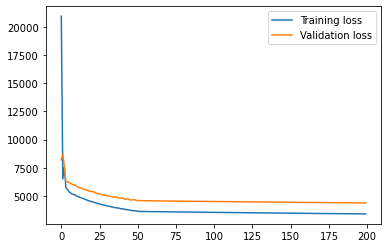

In [7]:
# Plot the loss
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

In [8]:
print(f"Model evaluation: {model.evaluate(X_test, y_test)}")

5/5 [==============================] - 0s 2ms/step - loss: 4365.2979
Model evaluation: 4365.2978515625


## Pick a random feature vector from the test set and output both predicted and the true values

In [9]:
for i in range(10):
    index = np.random.choice(X_test.shape[0], 1)
    print(f'Predicted value: {model.predict(X_test[index])[0][0]}, true value: {y_test[index[0]]}')

Predicted value: 155.5009765625, true value: 170.0
Predicted value: 127.75154113769531, true value: 60.0
Predicted value: 211.2311248779297, true value: 277.0
Predicted value: 204.67137145996094, true value: 180.0
Predicted value: 162.71200561523438, true value: 310.0
Predicted value: 100.87903594970703, true value: 45.0
Predicted value: 122.03954315185547, true value: 39.0
Predicted value: 131.3366241455078, true value: 79.0
Predicted value: 164.39358520507812, true value: 221.0
Predicted value: 187.35508728027344, true value: 150.0
